# **Trending YouTube Video Statistics**

Dataset:- https://www.kaggle.com/datasnaek/youtube-new

**About Dataset:-**

There are two kinds of data files, one includes comments and one includes video statistics. They are linked by the unique video_id field.

**The headers in the video file are:**

- video_id (Common id field to both comment and video csv files)
- title
- channel_title
- category_id (Can be looked up using the included JSON files, but varies per region so use the appropriate JSON file for the CSV file's country)
- tags (Separated by | character, [none] is displayed if there are no tags)
- views
- likes
- dislikes
- thumbnail_link
- date (Formatted like so: [day].[month])

**The headers in the comments file are:**

- video_id (Common id field to both comment and video csv files)
- comment_text
- likes
- replies

Goal: 
- Data Cleaning and Preprocessing




In [66]:
!pip install emoji

In [96]:
#importing libraries

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import os
from tqdm import tqdm


from nltk.corpus import stopwords

import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly
from wordcloud import WordCloud, STOPWORDS


import json
from datetime import datetime

In [68]:
#reading the data

us_videos = pd.read_csv('/content/USvideos.csv', error_bad_lines = False)
us_comments = pd.read_csv('/content/UScomments.csv', error_bad_lines = False)

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'
b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'


In [69]:
#checking the number of data-points in the dataset

print("Number of data points in videos data: ", us_videos.shape)
print('-' * 100)
print("The attributes of videos data: ", us_videos.columns.values)

Number of data points in videos data:  (7992, 11)
----------------------------------------------------------------------------------------------------
The attributes of videos data:  ['video_id' 'title' 'channel_title' 'category_id' 'tags' 'views' 'likes'
 'dislikes' 'comment_total' 'thumbnail_link' 'date']


In [70]:
print("Number of data points in comments data: ", us_comments.shape)
print('-' * 100)
print("The attributes of comments data: ", us_comments.columns.values)

Number of data points in comments data:  (691400, 4)
----------------------------------------------------------------------------------------------------
The attributes of comments data:  ['video_id' 'comment_text' 'likes' 'replies']


In [71]:
us_videos.head(5)

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09


In [72]:
us_comments.head(5)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [73]:
# check if we have any nan values are there

print(us_videos['video_id'].isnull().values.any())
print("number of nan values", us_videos['video_id'].isnull().values.sum())

False
number of nan values 0


In [74]:
print(us_videos['video_id'].isnull().values.any())
print("number of nan values", us_videos['video_id'].isnull().values.sum())

False
number of nan values 0


In [75]:
print(us_videos['title'].isnull().values.any())
print("number of nan values", us_videos['title'].isnull().values.sum())

False
number of nan values 0


In [76]:
print(us_videos['channel_title'].isnull().values.any())
print("number of nan values", us_videos['channel_title'].isnull().values.sum())

False
number of nan values 0


In [77]:
print(us_videos['category_id'].isnull().values.any())
print("number of nan values", us_videos['category_id'].isnull().values.sum())

False
number of nan values 0


In [78]:
print(us_videos['tags'].isnull().values.any())
print("number of nan values", us_videos['tags'].isnull().values.sum())

False
number of nan values 0


In [79]:
print(us_videos['views'].isnull().values.any())
print("number of nan values", us_videos['views'].isnull().values.sum())

False
number of nan values 0


In [80]:
print(us_videos['likes'].isnull().values.any())
print("number of nan values", us_videos['likes'].isnull().values.sum())

False
number of nan values 0


In [81]:
print(us_videos['dislikes'].isnull().values.any())
print("number of nan values", us_videos['dislikes'].isnull().values.sum())

False
number of nan values 0


In [82]:
print(us_videos['comment_total'].isnull().values.any())
print("number of nan values", us_videos['comment_total'].isnull().values.sum())

False
number of nan values 0


In [83]:
print(us_videos['thumbnail_link'].isnull().values.any())
print("number of nan values", us_videos['thumbnail_link'].isnull().values.sum())

False
number of nan values 0


In [84]:
print(us_videos['date'].isnull().values.any())
print("number of nan values", us_videos['date'].isnull().values.sum())

False
number of nan values 0


In [85]:
print(us_comments['video_id'].isnull().values.any())
print("number of nan values", us_comments['video_id'].isnull().values.sum())

False
number of nan values 0


In [86]:
print(us_comments['comment_text'].isnull().values.any())
print("number of nan values", us_comments['comment_text'].isnull().values.sum())

True
number of nan values 25


In [87]:
print(us_comments['likes'].isnull().values.any())
print("number of nan values", us_comments['likes'].isnull().values.sum())

False
number of nan values 0


In [88]:
print(us_comments['replies'].isnull().values.any())
print("number of nan values", us_comments['replies'].isnull().values.sum())

False
number of nan values 0


First, working on us_videos data for analysing what factors affects popularity of a YouTube video by Exploratory Data Analysis and Data Cleaning of an individual feature.

In [89]:
us_videos['video_id'].unique()

array(['XpVt6Z1Gjjo', 'K4wEI5zhHB0', 'cLdxuaxaQwc', ..., 'c74FjEqhCsc',
       'a5NIg5yyHWo', '3VSa-oARk-w'], dtype=object)

In [90]:
#us_videos.groupby('video_id')['video_id'].nunique()
us_videos_uni = us_videos['video_id'].drop_duplicates()
us_videos_uni.shape

(2364,)

In [91]:
us_videos['video_id'].shape

(7992,)

Since, a video could be in trending for several days. There might be multiple rows of a particular video. In order to calculate the total Views, Comments, Likes, Dislikes of a video, we need to groupby with video_id. The below script will give you the total no. of views/comments/likes, and dislikes of a video.


In [92]:
us_videos_uniq = us_videos.drop_duplicates()
print(us_videos_uniq.shape)

(7992, 11)


In [93]:
us_videos['video_id'].value_counts()

LunHybOKIjU    8
Oo0NJsr5m4I    8
Hlt3rA-oDao    8
OlI8r3nNUVw    7
74zJ4scJzNs    7
              ..
pCSgWJzEvrM    1
8ijNvyEbQ_g    1
-3lMEZ6k5NA    1
RRkdV_xmYOI    1
IRGEpm1AXRM    1
Name: video_id, Length: 2364, dtype: int64

In [101]:
us_videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7992 entries, 0 to 7991
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   video_id        7992 non-null   object 
 1   title           7992 non-null   object 
 2   channel_title   7992 non-null   object 
 3   category_id     7992 non-null   int64  
 4   tags            7992 non-null   object 
 5   views           7992 non-null   int64  
 6   likes           7992 non-null   int64  
 7   dislikes        7992 non-null   int64  
 8   comment_total   7992 non-null   int64  
 9   thumbnail_link  7992 non-null   object 
 10  date            7992 non-null   float64
 11  category        0 non-null      object 
dtypes: float64(1), int64(5), object(6)
memory usage: 749.4+ KB


In [102]:
us_videos.describe()

,category_id,views,likes,dislikes,comment_total,date
count,7992.000000,7.992000e+03,7.992000e+03,7992.000000,7992.000000,7992.000000
mean,20.217718,9.390269e+05,3.449193e+04,1781.625000,4608.489740,16.094249
std,7.415525,2.148263e+06,9.136160e+04,10822.103125,20252.758016,7.677674
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,1.100000
25%,17.000000,9.686375e+04,1.907500e+03,67.000000,286.000000,11.100000
50%,23.000000,3.086115e+05,8.652500e+03,272.500000,1085.500000,16.595000
75%,25.000000,9.588758e+05,3.021350e+04,1013.000000,3462.750000,21.100000
max,43.000000,4.150067e+07,2.010366e+06,318404.000000,736179.000000,30.090000


In [94]:
temp_df = us_videos.loc[us_videos['video_id'] == 'Oo0NJsr5m4I']
print(temp_df.head(3).to_string())

         video_id                                                            title channel_title  category_id                                                                                              tags    views  likes  dislikes  comment_total                                  thumbnail_link  date
5594  Oo0NJsr5m4I  Tourist terrified by new glass walkway that cracks under weight          CGTN           25  CCTVNews|News|CGTN|Breaking|Politics|ChinaNews|WorldNews|CCTV|skywalk|China|society|glass bridge  1474740  16256      3416           3859  https://i.ytimg.com/vi/Oo0NJsr5m4I/default.jpg  11.1
5794  Oo0NJsr5m4I  Tourist terrified by new glass walkway that cracks under weight          CGTN           25  CCTVNews|News|CGTN|Breaking|Politics|ChinaNews|WorldNews|CCTV|skywalk|China|society|glass bridge  3006284  29731      5727           6369  https://i.ytimg.com/vi/Oo0NJsr5m4I/default.jpg  12.1
6015  Oo0NJsr5m4I  Tourist terrified by new glass walkway that cracks under weight         

Here, the same videos might be posted again on different dates or the videos might be a video series. However, it can create a defect model (biased model). As some videos (same id) are posted more number of times than others.

In [100]:
print(us_videos.nunique())

video_id          2364
title             2398
channel_title     1230
category_id         16
tags              2204
views             7939
likes             6624
dislikes          2531
comment_total     4152
thumbnail_link    2364
date                40
category             0
dtype: int64


Let's create a new column 'likes_dislikes_ratio' and note that there can be vids with 0 dislikes and likes so we will have to handle that to avoid odd values.

In [106]:
zero_dislikes = len(us_videos.dislikes)-us_videos.dislikes.astype(bool).sum(axis=0)
zero_likes = len(us_videos.likes)-us_videos.likes.astype(bool).sum(axis=0)

print(f"There are {zero_likes} videos with 0 likes.")
print(f"There are {zero_dislikes} videos with 0 dislikes.")

There are 85 videos with 0 likes.
There are 213 videos with 0 dislikes.


So, if we have any zero in denominator(dislikes) then we will keep the its value same as number of likes and if we don't then we will calculate the ratio.

In [107]:
# this will hold all the ratios
likes_dislikes = {}

for i in range(len(us_videos['likes'])):
    
    # if the value of dislikes is not zero
    if us_videos['dislikes'][i]!=0:
        
        # compute the ratio
        likes_dislikes[i]=us_videos['likes'][i]/us_videos['dislikes'][i]
        
    else:
        
        # simply use the likes value
        likes_dislikes[i]=us_videos['likes'][i]
        
us_videos['likes_dislikes_ratio'] = likes_dislikes.values()

In [108]:
us_videos.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date,category,likes_dislikes_ratio
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09,NaN,53.962738
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09,NaN,6.966266
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09,NaN,14.496832
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09,NaN,5.498679
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09,NaN,170.186620


In [110]:
print(f"Does the data contain duplicate video_ids? - {us_videos.video_id.duplicated().any()}")


Does the data contain duplicate video_ids? - True


In [111]:
print(f"Before Deduplication : {us_videos.shape}")
us_videos = us_videos[~us_videos.video_id.duplicated(keep='last')]
print(f"After Deduplication : {us_videos.shape}")

print(f"Does the data contain duplicate video_ids now? - {us_videos.video_id.duplicated().any()}")

Before Deduplication : (7992, 13)
After Deduplication : (2364, 13)
Does the data contain duplicate video_ids now? - False


# **Data Cleaning**

Removing stopwords, punctuation marks, emojis, converting to lowercase, contracting strings, whitespace, etc.

In [31]:
us_videos['title'] = us_videos['title'].str.replace('The','')
#us_videos['title'] = us_videos['title'].str.replace(' ','')
us_videos['title'] = us_videos['title'].str.replace('&','_')
us_videos['title'] = us_videos['title'].str.replace(',','_')
us_videos['title'] = us_videos['title'].str.replace('|',' ')
us_videos['title'] = us_videos['title'].str.lower()

In [32]:
us_videos['channel_title'] = us_videos['channel_title'].str.replace('The','')
#us_videos['channel_title'] = us_videos['channel_title'].str.replace(' ','')
us_videos['channel_title'] = us_videos['channel_title'].str.replace('&','_')
us_videos['channel_title'] = us_videos['channel_title'].str.replace(',','_')
us_videos['channel_title'] = us_videos['channel_title'].str.replace('|',' ')
us_videos['channel_title'] = us_videos['channel_title'].str.lower()

In [33]:
us_videos['tags'] = us_videos['tags'].str.replace('The','')
#us_videos['tags'] = us_videos['tags'].str.replace(' ',' ')
us_videos['tags'] = us_videos['tags'].str.replace('&','_')
us_videos['tags'] = us_videos['tags'].str.replace(',','_')
us_videos['tags'] = us_videos['tags'].str.replace('|',' ')
us_videos['tags'] = us_videos['tags'].str.lower()

In [34]:
import emoji

def remove_emojis(s):
  return (''.join(c for c in s if c not in emoji.UNICODE_EMOJI))

In [35]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [36]:
#removing stopwords

# https://gist.github.com/sebleier/554280
# 'no', 'nor', 'not' are excluded
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [37]:
punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''

def remove_punc(s):

  for ele in s:
    if ele in punc:
        s = s.replace(ele, " ")
  return s

In [38]:
from tqdm import tqdm
def preprocess_text(text_data):
    preprocessed_text = []
    # tqdm is for printing the status bar
    for sentence in tqdm(text_data):
        sentence = str(sentence)
        sent = remove_punc(sentence)


        sent = remove_emojis(sentence)
        sent = decontracted(sentence)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\n', ' ')
        sent = sent.replace('\\"', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        # https://gist.github.com/sebleier/554280
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
        preprocessed_text.append(sent.lower().strip())
    return preprocessed_text

In [39]:
us_videos['title'] = preprocess_text(us_videos['title'].values)

100%|██████████| 7992/7992 [00:00<00:00, 18513.30it/s]


In [40]:
us_videos['channel_title'] = preprocess_text(us_videos['channel_title'].values)

100%|██████████| 7992/7992 [00:00<00:00, 34490.79it/s]


In [41]:
us_videos['tags'] = preprocess_text(us_videos['tags'].values)

100%|██████████| 7992/7992 [00:01<00:00, 4520.13it/s]


In [42]:
us_comments['comment_text'] = preprocess_text(us_comments['comment_text'].values)

100%|██████████| 691400/691400 [00:58<00:00, 11799.25it/s]


In [43]:
us_videos.head(5)

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 year vlogging logan paul changed youtube for...,logan paul vlogs,24,logan paul vlog logan paul logan paul olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iphone x introducing iphone x apple,apple,28,apple iphone 10 iphone ten iphone portrait lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,response,pewdiepie,22,none,5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09
3,WYYvHb03Eog,apple iphone x first look,verge,28,apple iphone x hands apple iphone x iphone x a...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
4,sjlHnJvXdQs,iphone x parody,jacksfilms,23,jacksfilms parody parodies iphone iphone x iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09


In [44]:
us_comments.head(5)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,logan paul yo big day,4,0
1,XpVt6Z1Gjjo,following start vine channel seen 365 vlogs,3,0
2,XpVt6Z1Gjjo,say hi kong maverick,3,0
3,XpVt6Z1Gjjo,fan attendance,3,0
4,XpVt6Z1Gjjo,trending,3,0


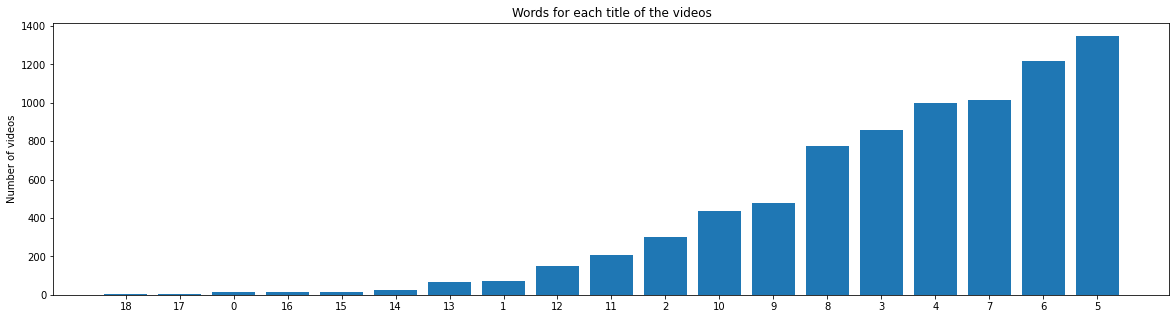

In [45]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
word_count = us_videos['title'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key = lambda kv: kv[1]))


ind = np.arange(len(word_dict))
plt.figure(figsize = (20,5))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Number of videos')
plt.title('Words for each title of the videos')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

Most of the videos has 5, 6, 7 title word count.

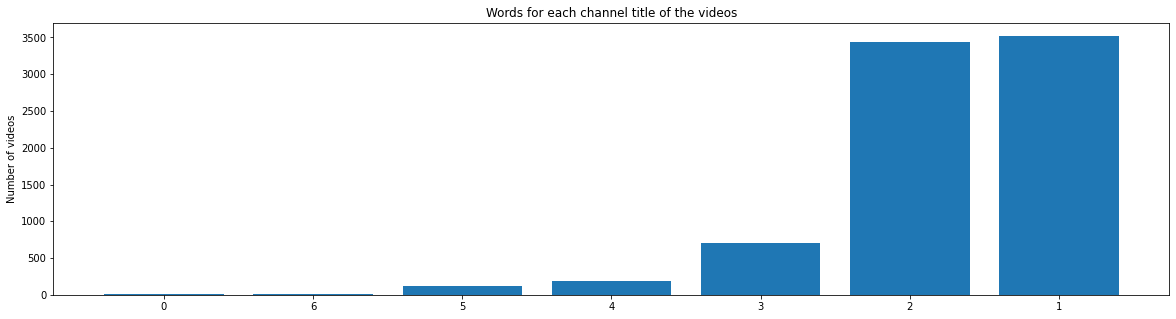

In [46]:
word_count = us_videos['channel_title'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key = lambda kv: kv[1]))


ind = np.arange(len(word_dict))
plt.figure(figsize = (20,5))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Number of videos')
plt.title('Words for each channel title of the videos')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

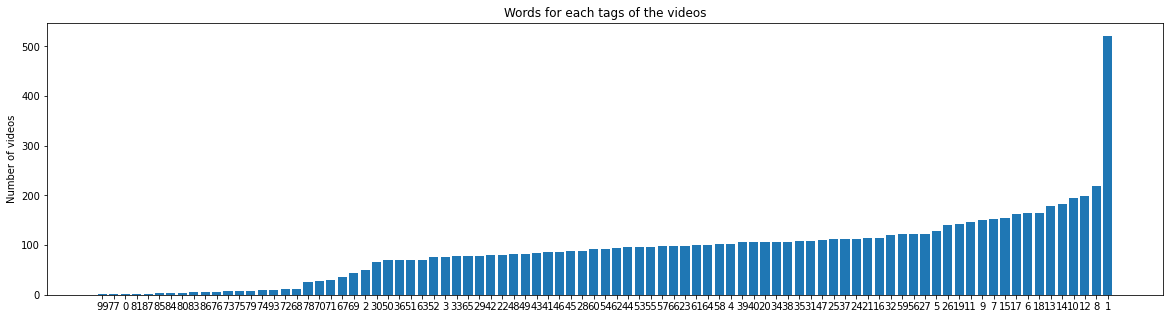

In [47]:
word_count = us_videos['tags'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key = lambda kv: kv[1]))


ind = np.arange(len(word_dict))
plt.figure(figsize = (20,5))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Number of videos')
plt.title('Words for each tags of the videos')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

Correlation between all features.

In [48]:
us_videos.corr()

,category_id,views,likes,dislikes,comment_total,date
category_id,1.000000,-0.037362,-0.059132,0.001107,-0.020860,0.008000
views,-0.037362,1.000000,0.832844,0.541955,0.715557,0.031203
likes,-0.059132,0.832844,1.000000,0.497439,0.836477,0.039599
dislikes,0.001107,0.541955,0.497439,1.000000,0.543983,0.026447
comment_total,-0.020860,0.715557,0.836477,0.543983,1.000000,0.025100
date,0.008000,0.031203,0.039599,0.026447,0.025100,1.000000


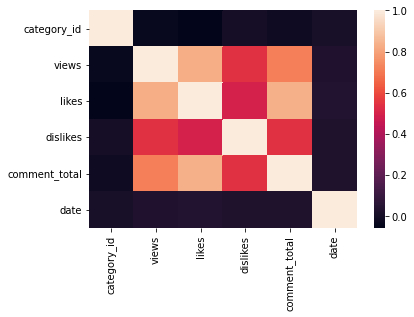

In [49]:
sns.heatmap(us_videos.corr())

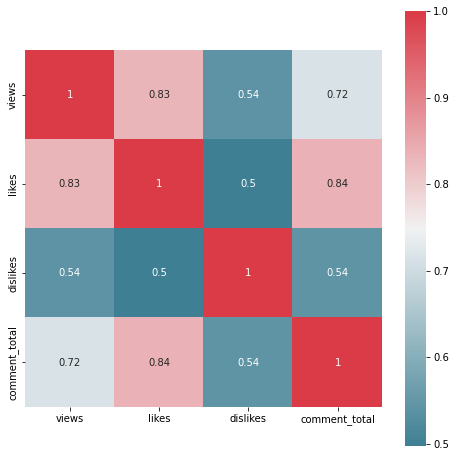

In [50]:
columns_show=['views', 'likes', 'dislikes', 'comment_total']
f, ax = plt.subplots(figsize=(8, 8))
corr = us_videos[columns_show].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

In the above matrix, for USA dataset, the columns with :-

- High Correlation - Views and Likes,, Comment_count and Dislikes
- Medium Correlation - Views and Dislikes, Views and Comment_count, Likes and comment_total
- Low Correlation - Likes and Dislikes

In [51]:
us_videos['tags'].head(10)

0    logan paul vlog logan paul logan paul olympics...
1    apple iphone 10 iphone ten iphone portrait lig...
2                                                 none
3    apple iphone x hands apple iphone x iphone x a...
4    jacksfilms parody parodies iphone iphone x iph...
5    a24 a24 films a24 trailers independent films t...
6    late night seth meyers check hud ben carson nb...
7    iphone x iphone x iphone 10 iphone x impressio...
8    roman atwood roman atwood roman atwood vlogs f...
9    screenjunkies screen junkies screenjunkies new...
Name: tags, dtype: object

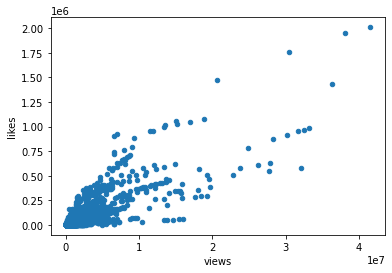

In [52]:
us_videos[['views','likes']].plot(kind='scatter', x='views', y='likes')

In [56]:
df_us_channel = (
    us_videos
    .assign(
        log_likes = lambda x: np.log(x.likes + 0.5)
    )
    .groupby('channel_title')
    .agg({
        'video_id':'nunique',
        'likes': ['mean', 'std'],
        'log_likes': ['mean', 'std'],
        'views': 'mean',
    })
    .sort_values(('video_id', 'nunique'), ascending=False)
)
df_us_channel.head(10)
#reference: https://www.kaggle.com/stuartday274/youtube-predicting-likes


video_id  ...         views
                                    nunique  ...          mean
channel_title                                ...              
tonight show starring jimmy fallon       21  ...  8.374148e+05
vox                                      20  ...  4.644381e+05
jimmy kimmel live                        18  ...  1.661808e+06
refinery29                               17  ...  2.089183e+04
ellenshow                                16  ...  1.238547e+06
nfl                                      15  ...  6.892325e+05
netflix                                  14  ...  1.857194e+06
late night seth meyers                   13  ...  1.211155e+06
late show stephen colbert                13  ...  9.926203e+05
espn                                     13  ...  5.343733e+05

[10 rows x 6 columns]